<h1>Анализ оттока клиентов для «Метанпромбанк»

**Описание проекта** 

Наш заказчик - отдел маркетинка одного из банков страны «Метанпромбанк», который располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
<br>В данном банке в последнее время заметно вырос отток клиентов настолько, что угрожает существованию бизнеса.
<br>Хоть раньше и проводилось подобное исследование, но его результаты более не актуальны и не позволяюют понять в чем проблема и как ее решить
<br>Уже известно, что привлекать новых клиентов дорого, дешевле удержать тех, про которых банк уже что-то знает и с которыми уже работают. В отделе маркетинга нет автоматизированных систем рассылок, письма каждому клиенту пишутся вручную, поэтому важно для отдела маркетинга представить компактные однородные сегменты и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.
<br>Результаты анализа нужны в виде презентации менеджеру, который занимается маркетинговыми компаниями и работает в тесной связке с менеджерами продуктов

**Цель анализа**

Проанализировать имеющиеся данные и дать рекоммендации по минимизации оттока клиентов, выделить сегменты отточных клиентов, склонных уходить из банка, чтобы они были однородными, высокоточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно привести к уменьшению оттока клиентов.

**Входные данные** 

Датасет содержит данные о клиентах банка «Метанпром». Файл с данными: bank_scrooge.csv
<br>Колонки:
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — приблизительная оценка собственности клиента,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочная заработная плата клиента,
- churn — ушёл или нет

**Шаги выполнения анализа**

**Шаг 1.** Откроем файл с данными и изучим общую информацию

**Шаг 2.** Предобработка данных.
- Приведем названия столбцов к единому стилю
- Проверим типы данных, откорректируем если это необходимо
- Закодируем пол и города
- Проверим, присутствуют ли в данных пропуски, оценим их влияние на исследование и примем соответствующее решение
- Проверим данные на наличие дубликатов и удалим их

**Шаг 3.** Исследовательский анализ данных
- Сравним портреты типичных клиентов, которые склонны и не склонны уходить из банка
- Проанализируем все данные на предмет наличия корреляций с целевой характеристикой
- Рассмотрим распределение непрерывных, в том числе в разрезе потока
- Рассмотрим уровни оттока по категориям
- Проведем корреляционный анализ

**Шаг 4.** Проверим статистические гипотезы
- Проверим гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались
- Выдвинем статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование исходя из сравнения типичных клиентов

**Шаг 5.** Резюмируем, какие показатели стратегически влияют на отток клиентов и какие интервалы их значений влияют на него

**Шаг 6.** Сегментация на основне стратегических показателей
- Выделим не мелкие, но компактные высокоточные сегменты
- Посчитаем резмер и оттток сегментов и приоретизируем их

**Шаг 7.** Подветем итоги и составим рекомендации для заказчика по приоритетным сегментам
- Общий вывод о проделанной работе и совершенных шагах
- Составим рекомендации для менеджера отдела маркетинга

**Шаг 1.** Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib

In [2]:
try:
    bs = pd.read_csv('bank_scrooge.csv')
except:
    bs = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
bs.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Видим, что:
- присутствует нарушение стиля в названиях столбцов
- в данных есть пропуски в стобцах "age" и "balance"
- для дальнейшего анализа потребуется занятся типами данных
- нужно проверить данные на наличие явных/неявных дубликатов

**Шаг 2.** Предобработка данных.

Сначала приведем названия столбцов к единому стилю

In [5]:
bs.columns = bs.columns.str.lower()

In [6]:
bs = bs.rename(columns={'userid':'user_id'})
bs.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Проверим наличие явных и неявных дубликатов

In [7]:
bs.duplicated().sum()

0

In [8]:
bs['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [9]:
bs.duplicated(subset=['user_id', 'city']).sum()

0

In [10]:
bs['user_id'].duplicated().sum()

73

По номеру пользователя обнаружено 73 дубликата. Относительно всех данных это составляет 0,73%, поэтому удаляем их 

In [11]:
bs = bs.drop_duplicates(subset=['user_id'])

Дубликаты устранены
<br>Теперь работаем с типами данных
<br>Для дальнейшего исследования необходимо будет закодировать пол и города численно, для этого создадим отдельные столбцы

In [12]:
bs['gender_01'] = bs['gender']
bs['city_01'] = bs['city']

In [13]:
bs = pd.get_dummies(bs, columns=['city_01'])
bs = pd.get_dummies(bs, columns=['gender_01'], drop_first= True)
bs.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_01_Ростов,city_01_Рыбинск,city_01_Ярославль,gender_01_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,0,1,0,1
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,0,0,1,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,0,0,1,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,0,0,1,1
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,0,0,1,0


In [14]:
bs = bs.rename(columns={'gender_01_М':'cod_gen',
                        'city_01_Ростов':'rostov',
                        'city_01_Рыбинск':'rybinsk',
                        'city_01_Ярославль':'yaroslavl'})

Посомтрим внимательней на пропуски в данных

In [15]:
bs.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
rostov              0
rybinsk             0
yaroslavl           0
cod_gen             0
dtype: int64

In [16]:
len(bs[bs['balance'].isna()]) / len(bs) * 100

22.766193210436185

Видим, что большая часть пропусков в столбце "balance" и их доля составляет почти 23%
<br>Такое кол-во может исказить исследование, поэтому оценим, что мы можем с ними сделать
<br>Кол-во пропусков в столбце "age" достаточно мало (0,04%), поэтому удалим их

In [17]:
bs.dropna(subset=['age'])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,1,0,1
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,0,1,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,0,1,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,0,1,0


In [18]:
bs_isn = bs[bs['balance'].isnull()]
bs_isn.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,2260.000000,2260.000000,2260.000000,2260.000000,0.0,2260.000000,2260.000000,2260.000000,2.260000e+03,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,171975.568584,865.334956,42.125664,0.051770,NaN,1.161504,0.815487,0.549115,2.267006e+05,0.005752,0.103982,0.254867,0.641150,0.558850
std,33277.188448,89.669447,11.953138,0.227525,NaN,0.401442,0.387988,0.497692,1.999817e+05,0.075642,0.305305,0.435883,0.479769,0.496635
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143067.000000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.204570e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172498.500000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.747554e+05,0.000000,0.000000,0.000000,1.000000,1.000000
75%,201354.250000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.404518e+05,0.000000,0.000000,1.000000,1.000000,1.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
bs_notn = bs[bs['balance'].notnull()]
bs_notn.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,7667.000000,7667.000000,7663.000000,7667.000000,7.667000e+03,7667.000000,7667.000000,7667.000000,7.667000e+03,7667.000000,7667.000000,7667.000000,7667.000000,7667.000000
mean,171669.365462,843.843094,42.907216,3.395983,8.289016e+05,2.080866,0.639885,0.515978,1.246609e+05,0.235685,0.154167,0.271032,0.574801,0.483762
std,33820.930001,55.338359,12.237337,1.584551,1.985272e+06,0.757764,0.480065,0.499777,1.048482e+05,0.424454,0.361133,0.444521,0.494405,0.499769
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142562.000000,801.000000,33.000000,2.000000,2.952611e+05,2.000000,0.000000,0.000000,6.758873e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172704.000000,841.000000,40.000000,4.000000,5.248943e+05,2.000000,1.000000,1.000000,1.063470e+05,0.000000,0.000000,0.000000,1.000000,0.000000
75%,201038.500000,882.000000,52.000000,5.000000,9.808015e+05,2.000000,1.000000,1.000000,1.553635e+05,0.000000,0.000000,1.000000,1.000000,1.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
bs.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,9927.000000,9927.000000,9923.000000,9927.000000,7.667000e+03,9927.000000,9927.000000,9927.000000,9.927000e+03,9927.000000,9927.000000,9927.000000,9927.000000,9927.000000
mean,171739.076257,848.735973,42.729215,2.634633,8.289016e+05,1.871562,0.679863,0.523522,1.478914e+05,0.183338,0.142742,0.267352,0.589906,0.500856
std,33696.488963,65.392866,12.177008,1.979286,1.985272e+06,0.792955,0.466552,0.499472,1.393658e+05,0.386963,0.349827,0.442600,0.491875,0.500024
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142720.000000,802.000000,33.000000,0.000000,2.952611e+05,1.000000,0.000000,0.000000,7.525178e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.248943e+05,2.000000,1.000000,1.000000,1.197114e+05,0.000000,0.000000,0.000000,1.000000,1.000000
75%,201160.500000,900.000000,51.000000,4.000000,9.808015e+05,2.000000,1.000000,1.000000,1.746733e+05,0.000000,0.000000,1.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Исходя из таблиц, видим, что у клиентов имеющих пропуски в столбце "balance":
1. выше средние показаталеи у столбцов:
  - score
  - credit_card
  - last_activity
  - est_salary
  - ниже доля отточных клиентов	
  - чаще это мужчины
2. ниже средние показатели у столбцов:
  - age
  - equity
  - products

In [21]:
bs_isn['churn'].value_counts()

0    2247
1      13
Name: churn, dtype: int64

In [22]:
bs_isn.groupby('products')['products'].count()

products
0       1
1    1921
2     310
3      28
Name: products, dtype: int64

In [23]:
bs_isn.groupby('city')['city'].count()

city
Ростов        235
Рыбинск       576
Ярославль    1449
Name: city, dtype: int64

In [24]:
bs_isn.groupby('gender')['gender'].count()

gender
Ж     997
М    1263
Name: gender, dtype: int64

Видим, что пропуски не связанны ни с ушедшими клиентами, ни с городом, ни с полом, а так же с иными численными данными(что видно по таблицам)
<br>Поэтому считаю, что с пропусками в данных никак не стоит взаимодействвать т.е. оставить без изменений, так как нет никаких логических взаимосвязей, по которым их можно заменить их или удалить.
<br>Т.е. считаю, что пропуски относятся к классификации MCAR - в рамках каждой из групп которая у нас есть, распределение пропусков случайно.

Проверим, есть лик в столбце клиенты не имеющие ни одного продукта
<br>Если такие имеются - удалим их, это явно ошибка в данных

In [25]:
bs[bs['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1,0,0


In [26]:
bs=bs[bs['products']!=0]

В итоге:
- исправлено нарушение стиля в названиях столбцов
- явных дубликатов в данных не обнаружено, неявные были устранены
- закодировали пол и города численно, для этого создали отдельные столбцы
- в данных есть пропуски в стобцах "age" и "balance", оставили их без изменений

**Шаг 3.** Исследовательский анализ данных

In [27]:
bs.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,9926.000000,9926.000000,9922.000000,9926.000000,7.667000e+03,9926.000000,9926.000000,9926.000000,9.926000e+03,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,171741.484284,848.724562,42.725559,2.634596,8.289016e+05,1.871751,0.679931,0.523574,1.479038e+05,0.183256,0.142756,0.267278,0.589966,0.500907
std,33697.332289,65.386276,12.172175,1.979382,1.985272e+06,0.792772,0.466526,0.499469,1.393674e+05,0.386896,0.349842,0.442561,0.491864,0.500024
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142715.000000,802.000000,33.000000,0.000000,2.952611e+05,1.000000,0.000000,0.000000,7.525207e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172654.000000,853.000000,40.000000,3.000000,5.248943e+05,2.000000,1.000000,1.000000,1.197154e+05,0.000000,0.000000,0.000000,1.000000,1.000000
75%,201161.750000,900.000000,51.000000,4.000000,9.808015e+05,2.000000,1.000000,1.000000,1.746796e+05,0.000000,0.000000,1.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
bs.query('churn == 0').describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,8107.000000,8107.000000,8104.000000,8107.000000,5.860000e+03,8107.000000,8107.000000,8107.000000,8.107000e+03,8107.0,8107.000000,8107.000000,8107.000000,8107.000000
mean,171913.450228,845.443691,43.016288,2.381152,7.348230e+05,1.758357,0.708770,0.483409,1.478125e+05,0.0,0.141976,0.273467,0.584557,0.467374
std,33328.142077,68.006608,12.372982,1.970365,1.960631e+06,0.713241,0.454357,0.499755,1.428057e+05,0.0,0.349047,0.445766,0.492829,0.498965
min,95384.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.0,0.000000,0.000000,0.000000,0.000000
25%,142985.500000,796.000000,34.000000,0.000000,2.786464e+05,1.000000,0.000000,0.000000,7.350065e+04,0.0,0.000000,0.000000,0.000000,0.000000
50%,173163.000000,848.000000,40.000000,3.000000,4.753524e+05,2.000000,1.000000,0.000000,1.182472e+05,0.0,0.000000,0.000000,1.000000,0.000000
75%,201157.500000,900.000000,51.000000,4.000000,8.538599e+05,2.000000,1.000000,1.000000,1.741243e+05,0.0,0.000000,1.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,0.0,1.000000,1.000000,1.000000,1.000000


In [29]:
bs.query('churn == 1').describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,1819.000000,1819.000000,1818.000000,1819.000000,1.807000e+03,1819.000000,1819.000000,1819.000000,1.819000e+03,1819.0,1819.000000,1819.000000,1819.000000,1819.000000
mean,170975.058824,863.346894,41.429593,3.764156,1.133993e+06,2.377130,0.551402,0.702584,1.483107e+05,1.0,0.146234,0.239692,0.614074,0.650357
std,35295.148748,49.571209,11.144754,1.586144,2.033978e+06,0.921951,0.497488,0.457247,1.229143e+05,0.0,0.353438,0.427013,0.486947,0.476988
min,94561.000000,706.000000,18.000000,0.000000,6.000000e+00,1.000000,0.000000,0.000000,1.088027e+04,1.0,0.000000,0.000000,0.000000,0.000000
25%,141300.000000,828.000000,32.000000,3.000000,3.872183e+05,2.000000,0.000000,0.000000,8.319661e+04,1.0,0.000000,0.000000,0.000000,0.000000
50%,170532.000000,866.000000,39.000000,4.000000,7.824105e+05,2.000000,1.000000,1.000000,1.253952e+05,1.0,0.000000,0.000000,1.000000,1.000000
75%,201399.500000,898.000000,52.000000,5.000000,1.348101e+06,3.000000,1.000000,1.000000,1.759854e+05,1.0,0.000000,0.000000,1.000000,1.000000
max,229058.000000,1000.000000,75.000000,9.000000,6.486621e+07,5.000000,1.000000,1.000000,1.263028e+06,1.0,1.000000,1.000000,1.000000,1.000000


In [30]:
g_bs = bs.groupby(['churn']).mean()
g_bs

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,rostov,rybinsk,yaroslavl,cod_gen
churn,,,,,,,,,,,,,
0,171913.450228,845.443691,43.016288,2.381152,7.348230e+05,1.758357,0.708770,0.483409,147812.485793,0.141976,0.273467,0.584557,0.467374
1,170975.058824,863.346894,41.429593,3.764156,1.133993e+06,2.377130,0.551402,0.702584,148310.728202,0.146234,0.239692,0.614074,0.650357


In [31]:
print(bs[bs['churn']==1]['churn'].count())
print((bs[bs['churn']==1]['churn'].count() / bs['churn'].count())*100)

1819
18.32560951037679


Процент оттока составляет 18.33%, т.е. 1819 клиентов
Исходя из таблиц видим небольшие различия между отточными и неотточными клиентами, кратко выделим особо выделяющиеся:
1. средняя оценка собственности отточных клиентов сильно выше, чем у неотточных
2. огромная разница по среднему балансу на счете, у отточных клиентов среднее значение много выше
3. у отточных клиентов в среднем больше продуктов
4. отточные клиенты были более активными, но при этом  реже имели кредитные карты
5. отточные клиенты чаще всего мужчины

In [32]:
sns.set_context('notebook') 
sns.set_style('ticks') 
sns.set_style('whitegrid')

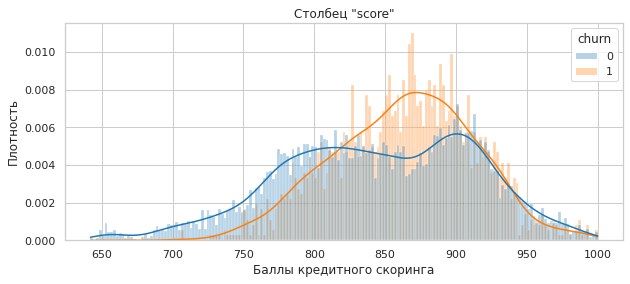

In [33]:
plt.subplots(figsize = (10, 4))
sns.histplot(bs, x=bs["score"], binwidth=2, kde=True,
            hue="churn", stat="density", common_norm=False, alpha=0.33)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.title('Столбец "score"')
plt.show()

Неотточный клиент: Баллы кредитного скоринга 780 - 835 или 870 - 910, заметный спад в районе 835-870
<br>Отточный клиент: Баллы кредитного скоринга 820-920

Доля оттока выше в промежутке 820-935

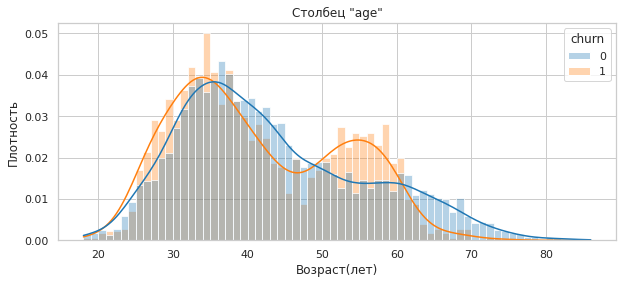

In [34]:
plt.subplots(figsize = (10, 4))
sns.histplot(data=bs, x=bs["age"], binwidth=1, kde=True,
            hue="churn", stat="density", common_norm=False, alpha=0.33)
plt.xlabel('Возраст(лет)')
plt.ylabel('Плотность')
plt.title('Столбец "age"')
plt.show()

Неотточный клиент: В основном их возраст составляет 31-42 года
<br>Отточный клиент: возраст в районе 29-38 лет

По графику заметно, что доля оттока выше в отрезках 23-35 и 50-60 лет

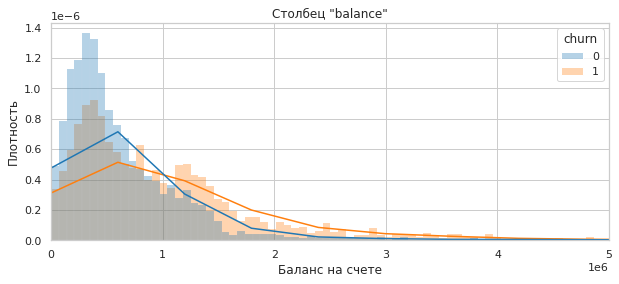

In [35]:
plt.subplots(figsize = (10, 4))
sns.histplot(data=bs, x="balance", kde=True,
             hue="churn", stat="density",
             common_norm=False, alpha=0.33)
plt.xlim(0, 5000000)
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.title('Столбец "balance"')
plt.show()

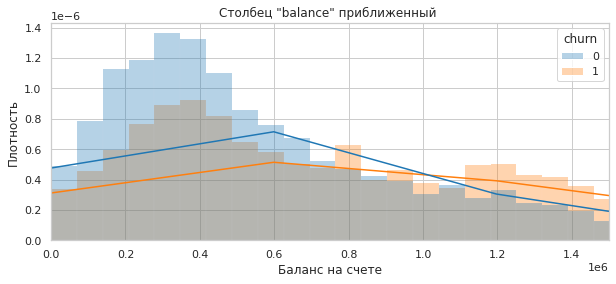

In [36]:
plt.subplots(figsize = (10, 4))
sns.histplot(data=bs, x="balance", kde=True,
             hue="churn", stat="density",
             common_norm=False, alpha=0.33)
plt.xlim(0, 1500000)
plt.xlabel('Баланс на счете')
plt.ylabel('Плотность')
plt.title('Столбец "balance" приближенный ')
plt.show()

Неотточный клиент: Баланс на счете 150 000 - 480 000, есть заметный пик в районе 300 000 - 410 000
<br>Отточный клиент: Баланс на счете 200 000-550 000

Доля оттока выше начиная с 1 000 000

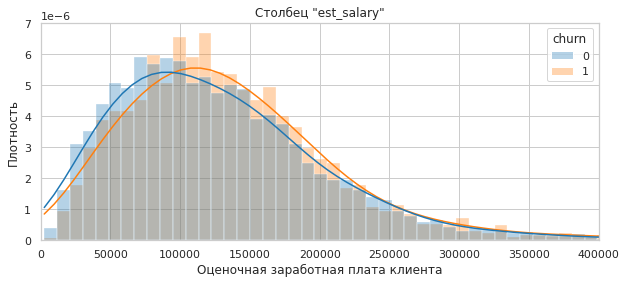

In [37]:
plt.subplots(figsize = (10, 4))
sns.histplot(data=bs, x="est_salary", kde=True, 
             hue="churn", stat="density", 
             common_norm=False, alpha=0.33)
plt.xlim(0, 400000)
plt.xlabel('Оценочная заработная плата клиента')
plt.ylabel('Плотность')
plt.title('Столбец "est_salary"')
plt.show()

Неотточный клиент: Оценочная заработная плата в районе 70 000-140 000
<br>Отточный клиент: Оценочная заработная плата составляет 60 000-180 000

Доля оттока выше начиная со 100 000

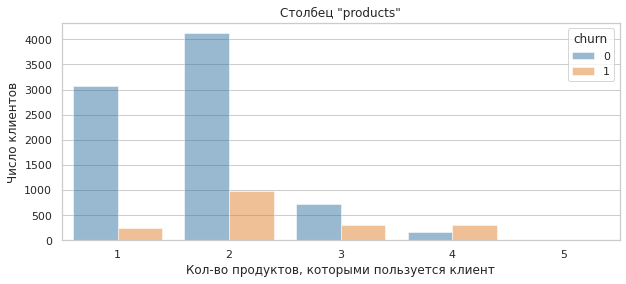

In [38]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="products", hue="churn", alpha=0.5)
plt.xlabel('Кол-во продуктов, которыми пользуется клиент')
plt.ylabel('Число клиентов')
plt.title('Столбец "products"')
plt.show()

In [39]:
products = bs.pivot_table(index = 'products', values = 'churn', aggfunc = ['count', 'sum'])
products.columns = ['0', '1']
products['churn%'] = products['1']/products['0']*100
products

,0,1,churn%
products,,,
1,3306,235,7.108288
2,5099,979,19.199843
3,1028,297,28.891051
4,474,300,63.291139
5,19,8,42.105263


Обе группы в основном пользуются 2-мя продуктами, но у неотточных так же большое кол-во тех, кто используют только 1
<br>По проценту оттока отчетливо видно, что чем больше продуктов клиент использует - тем сильнее вероятность оттока

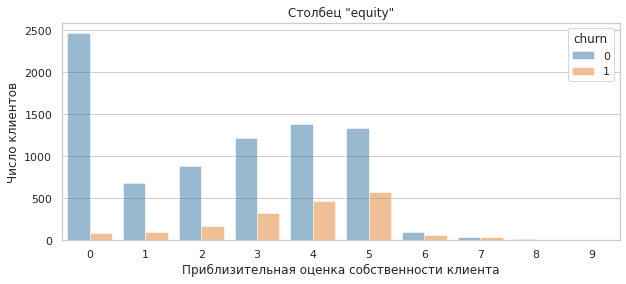

In [40]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="equity", hue="churn", alpha=0.5)
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Число клиентов')
plt.title('Столбец "equity"')
plt.show()

In [41]:
equity = bs.pivot_table(index = 'equity', values = 'churn', aggfunc = ['count', 'sum'])
equity.columns = ['0', '1']
equity['churn%'] = equity['1']/equity['0']*100
equity

,0,1,churn%
equity,,,
0,2554,90,3.523884
1,772,93,12.046632
2,1046,166,15.869981
3,1532,321,20.953003
4,1841,464,25.203694
5,1911,577,30.193616
6,161,58,36.024845
7,79,37,46.835443
8,17,6,35.294118


Неотточный клиент: в основном приблизительная оценка собственности клиента 0, но так же достаточно много клиентов с оценкой 3,4 и 5
<br>Отточный клиент: Приблизительная оценка собственности отточных клиентов в основном 4 и 5
<br>Самый большой % оттока у клиентов, имеющих 9 и 7 баллов. 
<br>Клиенты имеющие 4,5,6 и 8 баллов - так же имеют немалую вероятность уйти из банка
<br>Резюмируя - на лицо прямая зависимость оттока от приблизительной оценки собственности клиента

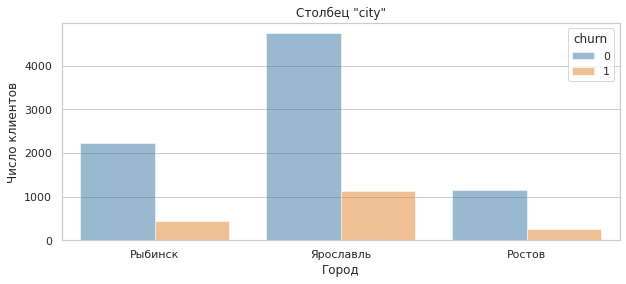

In [42]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="city", hue="churn", alpha=0.5)
plt.xlabel('Город')
plt.ylabel('Число клиентов')
plt.title('Столбец "city"')
plt.show()

In [43]:
city = bs.pivot_table(index = 'city', values = 'churn', aggfunc = ['count', 'sum'])
city.columns = ['0', '1']
city['churn%'] = city['1']/city['0']*100
city

,0,1,churn%
city,,,
Ростов,1417,266,18.772054
Рыбинск,2653,436,16.434225
Ярославль,5856,1117,19.074454


У обоих групп большинство пользователей из Ярославля
<br>Уровень оттока у городов мало различается друг от друга

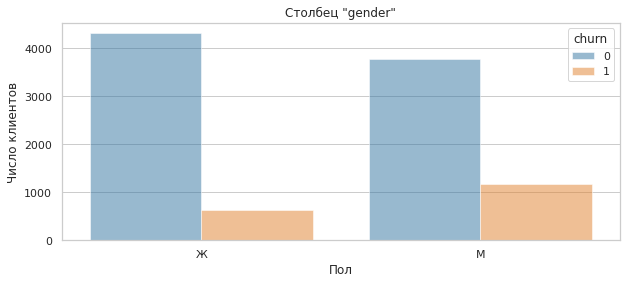

In [44]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="gender", hue="churn", alpha=0.5)
plt.xlabel('Пол')
plt.ylabel('Число клиентов')
plt.title('Столбец "gender"')
plt.show()

In [45]:
gender = bs.pivot_table(index = 'gender', values = 'churn', aggfunc = ['count', 'sum'])
gender.columns = ['0', '1']
gender['churn%'] = gender['1']/gender['0']*100
gender

,0,1,churn%
gender,,,
Ж,4954,636,12.838111
М,4972,1183,23.793242


Неотточный клиент: Женщины уходят реже, чем мужчины
<br>Клиенты мужского пола имеют достаточно немалый уровень оттока, грубо говоря 1 из 4-х мужчин уже покинул банк

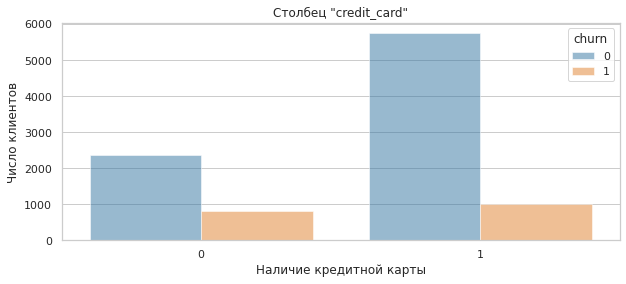

In [46]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="credit_card", hue="churn", alpha=0.5)
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Число клиентов')
plt.title('Столбец "credit_card"')
plt.show()

In [47]:
credit_card = bs.pivot_table(index = 'credit_card', values = 'churn', aggfunc = ['count', 'sum'])
credit_card.columns = ['0', '1']
credit_card['churn%'] = credit_card['1']/credit_card['0']*100
credit_card

,0,1,churn%
credit_card,,,
0,3177,816,25.684608
1,6749,1003,14.861461


Неотточный клиент: Чаще имеет 1 кредитную карту
<br>Отточный клиент: Нет ощутимой разницы по наличию/отсутствию кредитных карт
<br>Заметно, что клиенты, не имеющие кредитных карт подвержены оттоку (25.7%)

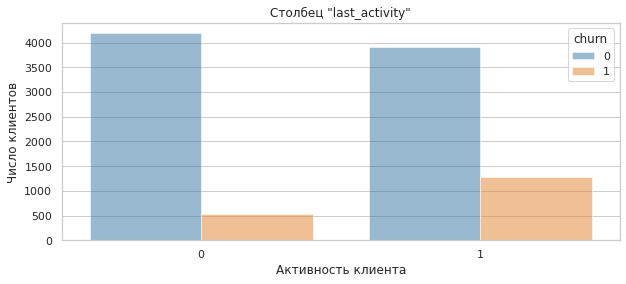

In [48]:
plt.subplots(figsize = (10, 4))
sns.countplot(data=bs, x="last_activity", hue="churn", alpha=0.5)
plt.xlabel('Активность клиента')
plt.ylabel('Число клиентов')
plt.title('Столбец "last_activity"')
plt.show()

In [49]:
last_activity = bs.pivot_table(index = 'last_activity', values = 'churn', aggfunc = ['count', 'sum'])
last_activity.columns = ['0', '1']
last_activity['churn%'] = last_activity['1']/last_activity['0']*100
last_activity

,0,1,churn%
last_activity,,,
0,4729,541,11.440051
1,5197,1278,24.591110


Неотточный клиент: нет существенной разницы в активности
<br>Отточный клиент: как правило это активные клиенты (почти 25% оттока)

Исходя из графиков, видим:

Неотточный клиент:
- Баллы кредитного скоринга 780 - 835 или 870 - 910
- Возраст 31-42 года
- Баланс на счете 150 000 - 480 000, есть заметный пик в районе 300 000 - 410 000
- Оценочная заработная плата 70 000-140 000
- Пользуется 2 продуктами
- Приблизительная оценка собственности клиента 0
- Город Ярославль
- Скорее всего Женщина
- Имеет 1 кредитную картау
- Нет особой разницы в активности

Отточный клиент:
- Баллы кредитного скоринга 820-920
- Возраст 29-38 лет
- Баланс на счете 200 000-550 000
- Оценочная заработная плата 60 000-180 000
- Пользуется 2 продуктами
- Приблизительная оценка собственности клиента 4 или 5
- Город Ярославль
- Пол Мужской
- Нет разницы по наличию/отсутствию кредитных карт
- Это активный клиенты

Видим, что отточные клиенты чаще мужчины, они немного моложе, чем клиенты неотточные, которые чаще всего являются женщинами; имеют выше заработную плату и более высокий баланс на счете, как и выоскую оценку собственности, в то время как у неотточных чаще всего оценка нулевая. Иными словами отточные пользователи более активные клиенты в сравнении с неотточными, что может свидетельствовать о том, что их либо не устраивают условия банка, либо они быстро находят конкурентов с более выгодным предложением.

Матрица корреляций

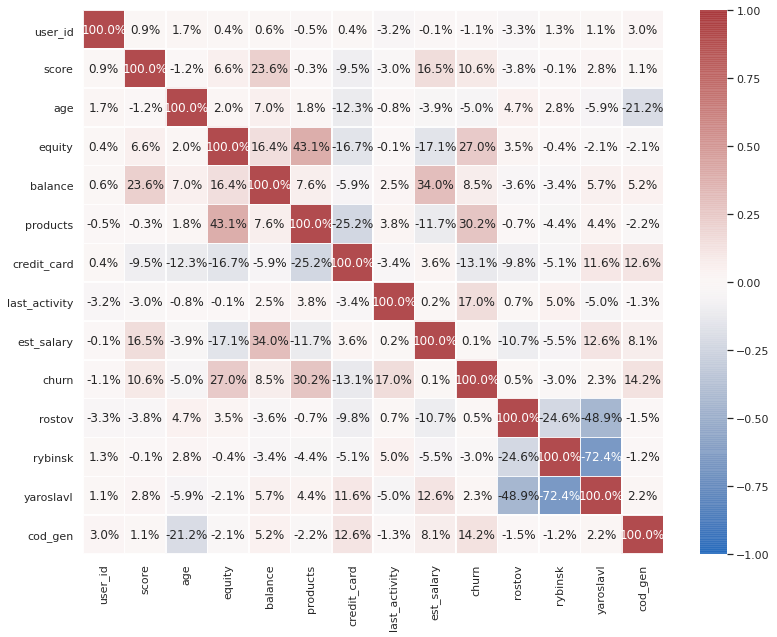

In [50]:
plt.subplots(figsize=(13, 10))
sns.heatmap(bs.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='vlag', linewidths=.5, fmt='.1%', alpha=.9)
plt.show()

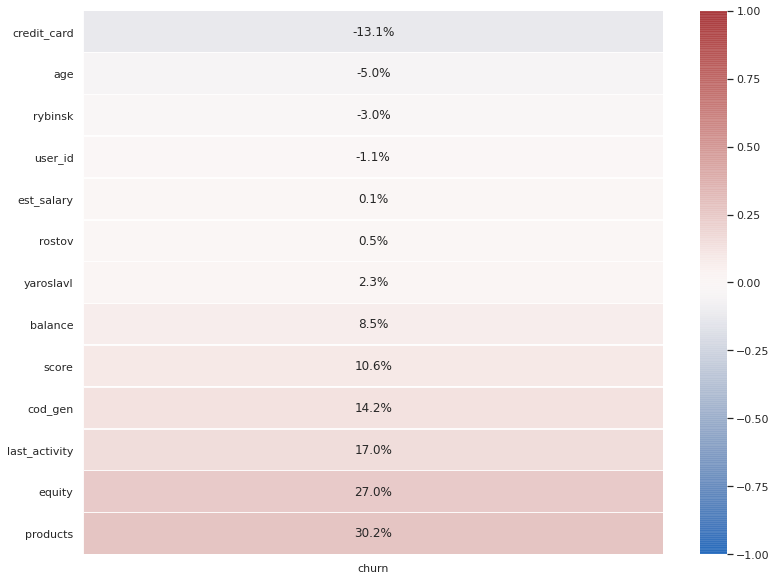

In [51]:
bs_corr = bs.corr()
plt.subplots(figsize=(13, 10))
sns.heatmap(bs_corr.loc[: ,["churn"]].drop("churn").sort_values("churn"),
            annot=True, vmin=-1, vmax=1, center= 0, cmap='vlag',
            linewidths=.5, fmt='.1%', alpha=.9)
plt.show()

Из матрицы видно, что наибольшая корреляция с показателем оттока клиентов у столбцов:
- score: 10.6%
- equity: 27.1%
- products: 30.1%
- credit_card: -13.1%
- last_activity: 16.9%
- cod_gen: 14.2% соответственно

По шкале Чеддока видим, что корреляции данных характеристик с нашей целевой характеристикой слаба, за исключением столбца "products", корреляция с которым является умеренной.  Несмотря на то, что небыло высокой тесноты связи с целевой характеристикой, при анализе мы установили наглядно, что некоторые показатели напрямую влияют на отток(например equity).

**Шаг 4.** Проверим статистические гипотезы

In [52]:
bs.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,rostov,rybinsk,yaroslavl,cod_gen
count,9926.000000,9926.000000,9922.000000,9926.000000,7.667000e+03,9926.000000,9926.000000,9926.000000,9.926000e+03,9926.000000,9926.000000,9926.000000,9926.000000,9926.000000
mean,171741.484284,848.724562,42.725559,2.634596,8.289016e+05,1.871751,0.679931,0.523574,1.479038e+05,0.183256,0.142756,0.267278,0.589966,0.500907
std,33697.332289,65.386276,12.172175,1.979382,1.985272e+06,0.792772,0.466526,0.499469,1.393674e+05,0.386896,0.349842,0.442561,0.491864,0.500024
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142715.000000,802.000000,33.000000,0.000000,2.952611e+05,1.000000,0.000000,0.000000,7.525207e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172654.000000,853.000000,40.000000,3.000000,5.248943e+05,2.000000,1.000000,1.000000,1.197154e+05,0.000000,0.000000,0.000000,1.000000,1.000000
75%,201161.750000,900.000000,51.000000,4.000000,9.808015e+05,2.000000,1.000000,1.000000,1.746796e+05,0.000000,0.000000,1.000000,1.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Считаю, что в большинстве столбцов данные распределены нормально: среднее и медиана имеют незначительные отличия, а стандартное отклонение небольшое.

In [53]:
st.shapiro(bs['est_salary'])

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6194590330123901, pvalue=0.0)

Исходя из теста - данные в столбце 'est_salary' нормально не распределены, поэтому будем использовать так же и u-критерий Манна-Уитни

1.Проверим гипотезу о различии дохода между теми клиентами, которые ушли и теми, которые остались

- H0:Средний доход ушедших клиентов равен среднему доходу клиентов, которые остались
- H1:Средний доход ушедших клиентов не равен среднему доходу клиентов, которые остались

Значение alpha зададим равным 0.05. Равность дисперсий установим False
<br>Используем st.ttest_ind, т.к. сравниваем средние двух генеральных совокупностей между собой


In [54]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['est_salary'],
    bs[bs['churn']==1]['est_salary'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.8796213894730411
Не получилось отвергнуть нулевую гипотезу


По t-критерию Стьюдента получили, что средний доход ушедших клиентов действительно равен среднему доходу клиентов, которые остались

In [55]:
alpha = 0.05
results = st.mannwhitneyu(
    bs[bs['churn']==0]['est_salary'],
    bs[bs['churn']==1]['est_salary'], alternative='two-sided')

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.00022703693954923942
Отвергаем нулевую гипотезу


По u-критерию Манна-Уитни получили обратное, что средний доход ушедших клиентов не равен среднему доходу клиентов, которые остались

Будем двоерять u-критерию Манна-Уитни, т.к. он не требует нормальности распределения и в данном случае показывает более точные результаты, в то время как для критерия Стьюдента требование нормальности не выполняется

2.Проверим гипотезу о том, что кол-во используемых продуктов тех клиентов, которые ушли и тех, которые остались, различается

- H0:Кол-во используемых продуктов ушедших клиентов равно кол-ву используемых продуктов клиентов, которые остались
- H1:Кол-во используемых продуктов ушедших клиентов не равно кол-ву используемых продуктов клиентов, которые остались

Аналогично предыдущему значение alpha зададим равным 0.05. Равность дисперсий - False
<br>Используем st.ttest_ind

In [56]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['products'],
    bs[bs['churn']==1]['products'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 7.964667361392785e-139
Отвергаем нулевую гипотезу


Кол-во используемых продуктов тех клиентов, которые ушли и тех, которые остались, различается

3.Проверим гипотезу о том, что приблизительная оценка собственности клиента тех клиентов, которые ушли и тех, которые остались, различается

- H0:Оценка собственности ушедших клиентов равно оценке собственности клиентов, которые остались
- H1:Оценка собственности ушедших клиентов не равна оценке собственности клиентов, которые остались

Аналогично предыдущему значение alpha = 0.05. Равность дисперсий - False. Используем st.ttest_ind

In [57]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['equity'],
    bs[bs['churn']==1]['equity'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 8.69455598249367e-196
Отвергаем нулевую гипотезу


Приблизительная оценка собственности клиента тех клиентов, которые ушли и тех, которые остались, действительно различаются

4.Проверим гипотезу о том, что пол тех клиентов, которые ушли влияет на отток

- H0:Кол-во ушедших мужчин равно кол-ву ушедших женщин
- H1:Кол-во ушедших мужчин не равно кол-ву ушедших женщин

Значение alpha = 0.05. Равность дисперсий - False. Используем st.ttest_ind

In [58]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['cod_gen'],
    bs[bs['churn']==1]['cod_gen'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 6.222859513206651e-47
Отвергаем нулевую гипотезу


Видим, что пол все же имеет влияние на отток

5.Проверим гипотезу о том, что активность клиента влияет на отток

- H0:Активность ушедших клиентов равна активности клиентов, которые остались
- H1:Активность ушедших клиентов не равна активности клиентов, которые остались

Значение alpha = 0.05. Равность дисперсий - False. Используем st.ttest_ind

In [59]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['last_activity'],
    bs[bs['churn']==1]['last_activity'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 8.051660477477419e-70
Отвергаем нулевую гипотезу


Активность ушедших клиентов и активность клиентов, которые остались, различна

6.Проверим гипотезу о том, что наличие кредитной карты влияет на отток

- H0:Кол-во ушедших клиентов с кредитной картой равно кол-ву оставшихся клиентов с кредитной картой
- H1:Кол-во ушедших клиентов с кредитной картой не равно кол-ву оставшихся клиентов с кредитной картой

Значение alpha = 0.05. Равность дисперсий - False. Используем st.ttest_ind

In [60]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['credit_card'],
    bs[bs['churn']==1]['credit_card'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 3.1017054142570824e-34
Отвергаем нулевую гипотезу


Нулевую гипотезу овтергли, а значит наличие кредитной карты все же влияет на отток

7.Проверим гипотезу о том, что кол-во баллов кредитного скоринга тех клиентов, которые ушли и тех, которые остались, различается

In [61]:
st.shapiro(bs['score'])

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9884443879127502, pvalue=1.2511455290391744e-27)

Тест Шапиро-Уилка показал, что данные нормально не распредлены, поэтому вдобавок к t-тесту бидем использовать и u-тест

- H0:Кол-во баллов кредитного скоринга тех клиентов, которые ушли равно кол-ву баллов кредитного скоринга тех клиентов, которые остались
- H1:Кол-во баллов кредитного скоринга тех клиентов, которые ушли не равно кол-ву баллов кредитного скоринга тех клиентов, которые остались

Значение alpha = 0.05. Равность дисперсий - False.

In [62]:
alpha = 0.05
results = st.ttest_ind(
    bs[bs['churn']==0]['score'],
    bs[bs['churn']==1]['score'], equal_var = False)

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 2.5258910795157677e-37
Отвергаем нулевую гипотезу


In [63]:
alpha = 0.05
results = st.mannwhitneyu(
    bs[bs['churn']==0]['score'],
    bs[bs['churn']==1]['score'], alternative='two-sided')

print('Значение p-value:', results.pvalue)

if (results.pvalue < alpha):
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 6.664136275637176e-22
Отвергаем нулевую гипотезу


Оба теста подтвердили, что кол-во баллов кредитного скоринга тех клиентов, которые ушли и тех, которые остались, различается

**Шаг 5.** Резюмируем, какие показатели стратегически влияют на отток клиентов и какие
интервалы их значений влияют на него

Стратегически влияют на отток клиентов следующие показатели:

1. Оценочная заработная плата - у основной части отточных клиентов составляет 60 000-180 000 (корреляция 0.1%)
2. Количество продуктов, которыми пользуется клиент - уходили те, кто пользовался 2-мя продуктами и более (корреляция 30.1%)
3. Приблизительная оценка собственности клиента - в основном уходят клиенты с оценкой 4-5 баллов (корреляция 27.1%)
4. Активность клиентов - активные клиенты чаще всего склонны уходить (корреляция 16.9%)
5. Пол клиентов - в основном уходят именно мужчины (корреляция f_gen и m_gen -14.1% и 14.1% соответственно)
6. Наличие кредитной карты тоже влияет на отток (корреляция -13.1%)
7. Кол-во баллов кредитного скоринга в основном в отрезке 820-920 баллов (корреляция 10.6%)

**Шаг 6.** Сегментация на основне стратегических показателей

In [64]:
bs.query('credit_card==0 and cod_gen==1 and products>=2 and equity>=4 \
         and last_activity==1 and score >= 820'
        ).agg({"churn":["mean","sum","count"],
               "score":["mean"], "equity":["mean"],
               "products":["mean"]})

,churn,score,equity,products
mean,0.716129,885.780645,4.864516,2.5
sum,222.000000,NaN,NaN,NaN
count,310.000000,NaN,NaN,NaN


**Cегмент 1** мужчины не имеющие кредитную карту, являющиеся активными пользователями, использующие 2 или более продуктов.
<br>Приблизительная оценка собственности 4 или более
<br>Кол-во баллов кредитного скоринга 820 и более

Процент оттока: 71%

In [65]:
bs.query('credit_card==0 and cod_gen==0 and products>=2 and equity>=4 \
         and last_activity==1 and score >= 800 and age>=30 and balance>=500000'
        ).agg({"churn":["mean","sum","count"],
               "score":["mean"], "equity":["mean"],
               "products":["mean"]})

,churn,score,equity,products
mean,0.48,876.384615,4.689231,2.44
sum,156.00,NaN,NaN,NaN
count,325.00,NaN,NaN,NaN


**Cегмент 2** женщины от 30 лет не имеющие кредитную карту, являющиеся активными пользователями, использующие 2 или более продуктов.
<br>Приблизительная оценка собственности 4 или более
<br>Баллы кредитного скоринга более 800
<br>Баланс на счёте от 500 000


Процент оттока: 48%

In [66]:
bs.query('credit_card==1 and equity>=2 and balance<=1000000 \
         and yaroslavl==1 and score>=850 and age>=27 and age<=65 \
         and est_salary<=150000 and est_salary>=70000'
        ).agg({"churn":["mean","sum","count"],
               "score":["mean"], "equity":["mean"],
               "products":["mean"]})

,churn,score,equity,products
mean,0.314286,884.533333,4.095238,1.936508
sum,99.000000,NaN,NaN,NaN
count,315.000000,NaN,NaN,NaN


**Cегмент 3** пользователи возрастом от 27 до 65 лет, имеющие кредитную карту, проживающие в городе Ярославль
<br>Приблизительная оценка собственности 2 или более
<br>Баллы кредитного скоринга более 850
<br>Баланс на счёте не более 1 000 000
<br>Оценочная заработная плата клиента от 70 000 до 150 000

Процент оттока: 31.4%

**Шаг 7.** Подветем итоги и составим рекомендации для заказчика по приоритетным сегментам

В ходе исследования были получены данные о клиентах банка «Метанпром»
<br>Данные были изучены и предобработаны:
- исправленs нарушение стиля в названиях столбцов
- явных дубликатов в данных не обнаружено, неявные были устранены
- закодировали пол и города численно, для этого создали отдельные столбцы
- в данных есть пропуски в стобцах "age" - они устранены и в столбце "balance" - мы оставили их без изменений

В ходе исследовательского анализа данных составили портреты типичных клиентов, которые склонны и не склонны уходить из банка
<br>Выяснили, что отточные клиенты чаще мужчины, они немного моложе, чем клиенты неотточные, которые чаще всего являются женщинами; имеют выше заработную плату и более высокий баланс на счете, как и выоскую оценку собственности, в то время как у неотточных чаще всего оценка нулевая.
<br>Исходя из матрицы корреляций увидели, что наибольшая корреляция с показателем оттока клиентов у столбцов: score: 10.6%, equity: 27.1%, products: 30.1%, credit_card: -13.1%, last_activity: 16.9%, cod_gen 14.2%.
<br>Корреляции данных характеристик с нашей целевой характеристикой имеются, но слабые, за исключением столбца "products", корреляция с которым является умеренной.

Проверили статистические гипотезы, которые подтвердили показатели стратегически влияющие на отток клиентов:
1. Оценочная заработная плата - у основной части отточных клиентов составляет 60 000-180 000 (корреляция 0.1%)
2. Количество продуктов, которыми пользуется клиент - уходили те, кто пользовался 2-мя продуктами и более (корреляция 30.1%)
3. Приблизительная оценка собственности клиента - в основном уходят клиенты с оценкой 4-5 баллов (корреляция 27.1%)
4. Активность клиентов - активные клиенты чаще всего склонны уходить (корреляция 16.9%)
5. Пол клиентов - в основном уходят именно мужчины (корреляция f_gen и m_gen -14.1% и 14.1% соответственно)
6. Наличие кредитной карты тоже влияет на отток (корреляция -13.1%)
7. Кол-во баллов кредитного скоринга в основном в отрезке 820-920 баллов (корреляция 10.6%)

Провели сегментацию на основне стратегических показателей и выделили 3 сегмента:

**Cегмент 1** мужчины не имеющие кредитную карту, являющиеся активными пользователями, использующие 2 или более продуктов.
<br>Приблизительная оценка собственности 4 или более
<br>Кол-во баллов кредитного скоринга 820 и более
<br>Процент оттока: 71%

**Cегмент 2** женщины от 30 лет не имеющие кредитную карту, являющиеся активными пользователями, использующие 2 или более продуктов.
<br>Приблизительная оценка собственности 4 или более
<br>Баллы кредитного скоринга более 800
<br>Баланс на счёте от 500 000
Процент оттока: 48%

**Cегмент 3** пользователи возрастом от 27 до 65 лет, имеющие кредитную карту, проживающие в городе Ярославль
<br>Приблизительная оценка собственности 2 или более
<br>Баллы кредитного скоринга более 850
<br>Баланс на счёте не более 1 000 000
<br>Оценочная заработная плата клиента от 70 000 до 150 000
Процент оттока: 31.4%

По итогам проведенного исследования:
<br>Заметно, что в зоне риска находятся именно **активные** клиенты, пользующиеся 2-мя и более продуктами компании и большими финансовыми показателями, такими как приблизительная оценка собственности и кол-во баллов кредитного скоринга, в то время как менее активные пользователи с менее высоким аналогичными показателями наоборот показывают маленький процент оттока.

Рекомендации:
<br>**Cегмент 1** провести акцию и предложить особые условия по кредитной карте, повышенный кэшбек на фитнес, отдых или туризм, а так же изменить/улучшить продукты или сделать новые, т.к. имеющиеся в чем-то клиентов не устраивают. Выгодные условия по страхованию недвижимости лишними не будут.
<br>**Cегмент 2** так же предложить им оформить кредитную карту или страхование недвижимости по выгодным условиям, повышенный кэшбек на магазины одежды, фитнес, товары для детей и дома, украшения, одежда, порфюм и т.п.(женщины же). Предложить выгодные условия по вкладам.
<br>**Cегмент 3** для клиентов г. Ярославля предложить выгодные условия по ипотеке и страхованию, для клиентов этого же сегмента постарше - льготы связанные с пенсией, так же страхование жизни и здоровья.

Ссылка на презентацию: https://drive.google.com/file/d/1T3HOrrvCXBil9VcfuWHU8M7z89wvpY8l/view?usp=sharing